In [ ]:
!pip install pandasai --user

### Introduction to PandasAI
1. PandasAI is a Python library that makes it easy to ask questions to your data in natural language.<br>
2. Beyond querying, PandasAI offers functionalities to visualize data through graphs, cleanse datasets by addressing missing values, and enhance data quality through feature generation, making it a comprehensive tool for data scientists and analysts.<br>

### Features
1. Natural language querying: Ask questions to your data in natural language.
2. Data visualization: Generate graphs and charts to visualize your data.
3. Data cleansing: Cleanse datasets by addressing missing values.
4. Feature generation: Enhance data quality through feature generation.
5. Data connectors: Connect to various data sources like CSV, XLSX, PostgreSQL, MySQL, BigQuery, Databrick, Snowflake, etc.

### How does PandasAI work?
PandasAI uses a generative AI model to understand and interpret natural language queries and translate them into python code and SQL queries. It then uses the code to interact with the data and return the results to the user.

In [ ]:
!pip install pandasai --user

In [1]:
from dotenv import load_dotenv

In [2]:
import os

In [3]:
%load_ext dotenv
%dotenv

In [4]:
os.environ["PANDASAI_API_KEY"]=os.getenv("PANDASAI_API_KEY")

In [6]:
import os
from pandasai import SmartDataframe
import pandas as pd

# pandas dataframe
sales_by_country = pd.DataFrame({
    "country": ["United States", "United Kingdom", "France", "Germany", "Italy", "Spain", "Canada", "Australia", "Japan", "China"],
    "sales": [5000, 3200, 2900, 4100, 2300, 2100, 2500, 2600, 4500, 7000]
})



In [7]:

# By default, unless you choose a different LLM, it will use BambooLLM.
# You can get your free API key signing up at https://pandabi.ai (you can also configure it in your .env file)
##os.environ["PANDASAI_API_KEY"] = "your key"
##os.environ["PANDASAI_API_KEY"]=os.getenv("PANDASAI_API_KEY")
# convert to SmartDataframe
sdf = SmartDataframe(sales_by_country)

response = sdf.chat('Which are the top 5 countries by sales?')
print(response)
# Output: China, United States, Japan, Germany, Australia

          country  sales
9           China   7000
0   United States   5000
8           Japan   4500
3         Germany   4100
1  United Kingdom   3200


In [25]:
sales_by_country

,country,sales
0,United States,5000
1,United Kingdom,3200
2,France,2900
3,Germany,4100
4,Italy,2300
5,Spain,2100
6,Canada,2500
7,Australia,2600
8,Japan,4500
9,China,7000


In [23]:
response=sdf.chat('What is sales of China?')
response

'The sales of China are: 7000'

In [26]:
response=sdf.chat('Which country is having min sales?')
response

'Spain'

In [7]:
d1=pd.read_csv('Loan payments data.csv')
d1

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [6]:
# You can instantiate a SmartDataframe with a path to a CSV file
sdf = SmartDataframe("Loan payments data.csv")

response = sdf.chat("How many loans are from men and have been paid off?")
print(response)

247


In [8]:
response = sdf.chat("How many records are there?")
print(response)

500


In [9]:
response = sdf.chat("How many columns are there?")
print(response)

11


In [10]:
response = sdf.chat("what is average age in this dataset?")
print(response)

31.116


In [3]:
type(sdf)

pandasai.smart_dataframe.SmartDataframe

In [8]:
# You can instantiate a SmartDataframe with a path to a Parquet file
sdf = SmartDataframe("Loan payments data.parquet")

response = sdf.chat("How many loans are from men and have been paid off?")
print(response)

247


In [9]:
# You can instantiate a SmartDataframe with a path to an Excel file
sdf = SmartDataframe("Loan payments data.xlsx")

response = sdf.chat("How many loans are from men and have been paid off?")
print(response)

247


In [11]:
import seaborn as sns
from pandasai import SmartDataframe

data = sns.load_dataset('titanic')
df = SmartDataframe(data)

In [16]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.chat('how many passengers were survived?')

342

In [15]:
response = df.chat("""Return the survived class in percentage""")

response

'The percentage of passengers who survived is 38.38%'

In [17]:
#Data Summary
summary = df.chat("""Can you get me the statistical summary of the dataset""")

#Class percentage
surv_pclass_perc = df.chat("""Return the survived in percentage breakdown by pclass""")

#Missing Data
missing_data_perc = df.chat("""Return the missing data percentage for the columns""")

#Outlier Data
outlier_fare_data = response = df.chat("""Please provide me the data rows that
contains outlier data based on fare column""")

In [20]:
surv_pclass_perc 

,pclass,survived_percentage
0,1,62.962963
1,2,47.282609
2,3,24.236253


In [18]:
summary

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
missing_data_perc

,Column,Missing Data Percentage
0,survived,0.000000
1,pclass,0.000000
2,sex,0.000000
3,age,19.865320
4,sibsp,0.000000
5,parch,0.000000
6,fare,0.000000
7,embarked,0.224467
8,class,0.000000
9,who,0.000000


In [19]:
outlier_fare_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
849,1,1,female,NaN,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False


### Data Visualization with Pandas AI
 

'C:/Users/mmalhariwa001/AION/exports/charts/temp_chart.png'

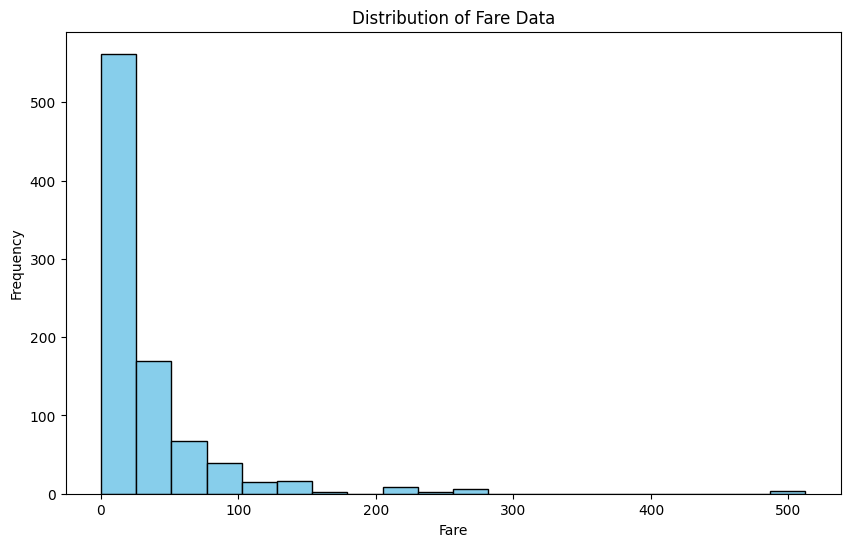

In [14]:
response = df.chat('Please provide me the fare data distribution visualization')

response

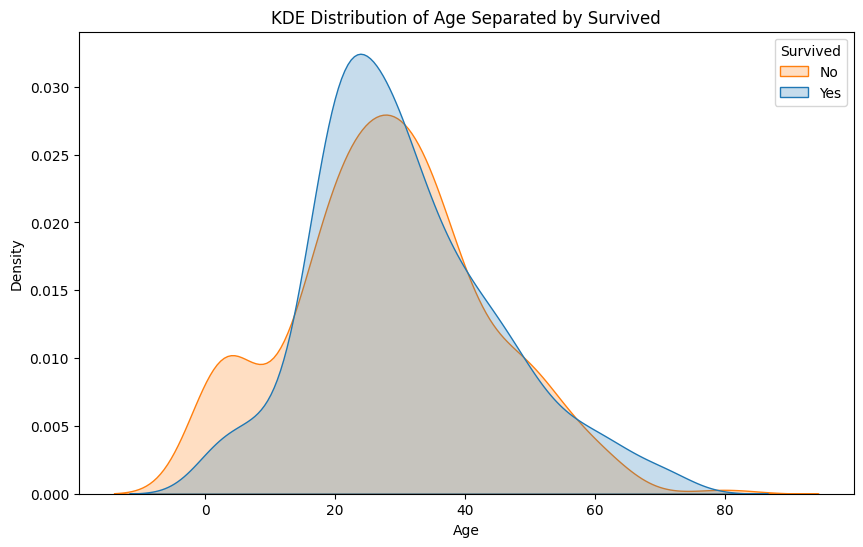

Traceback (most recent call last):
  File "C:\Users\mmalhariwa001\AppData\Roaming\Python\Python310\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 310, in run
    ).run(input)
  File "C:\Users\mmalhariwa001\AppData\Roaming\Python\Python310\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "C:\Users\mmalhariwa001\AppData\Roaming\Python\Python310\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
  File "C:\Users\mmalhariwa001\AppData\Roaming\Python\Python310\site-packages\pandasai\pipelines\chat\code_execution.py", line 113, in execute
    raise e
  File "C:\Users\mmalhariwa001\AppData\Roaming\Python\Python310\site-packages\pandasai\pipelines\chat\code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
  File "C:\Users\mmalhariwa001\AppData\Roaming\Python\Python310\site-packages\pandasai\pipelines\chat\code_execution.py", line 171, in execute_co

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

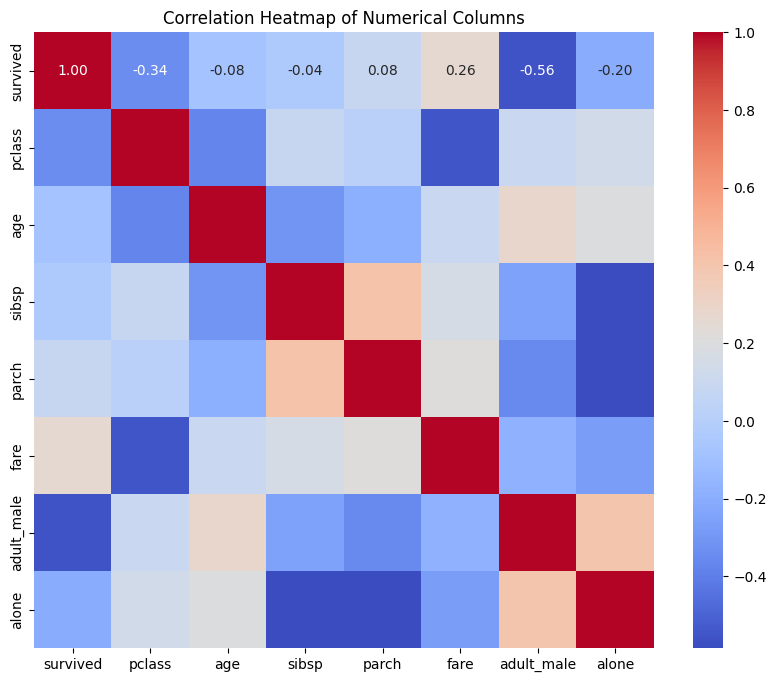

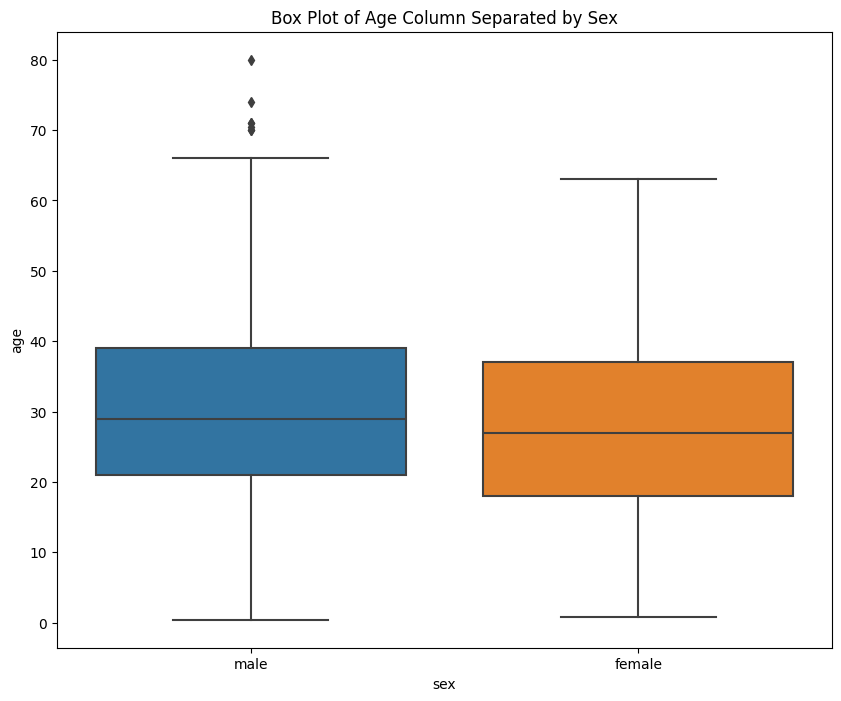

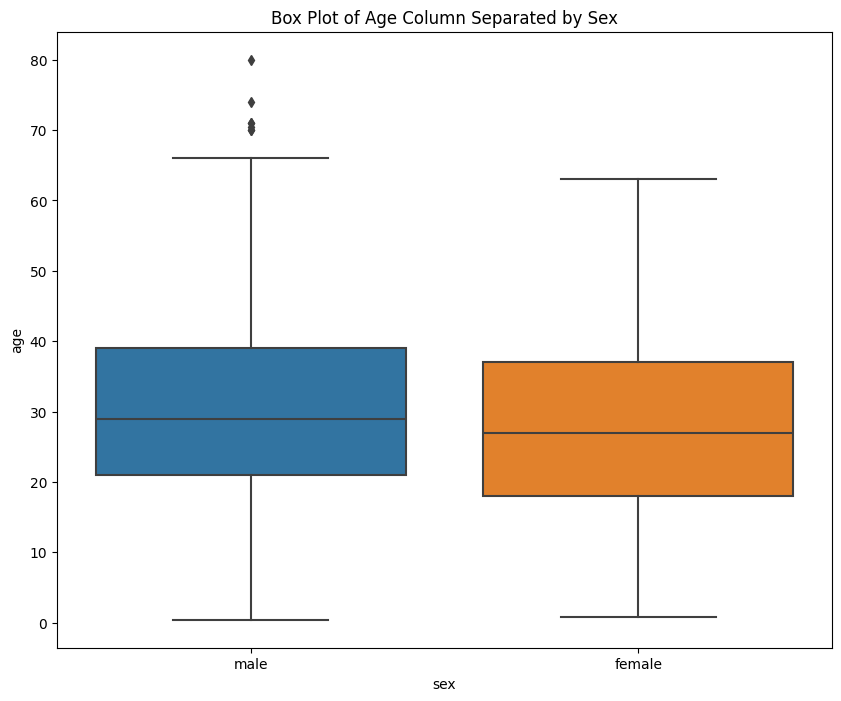

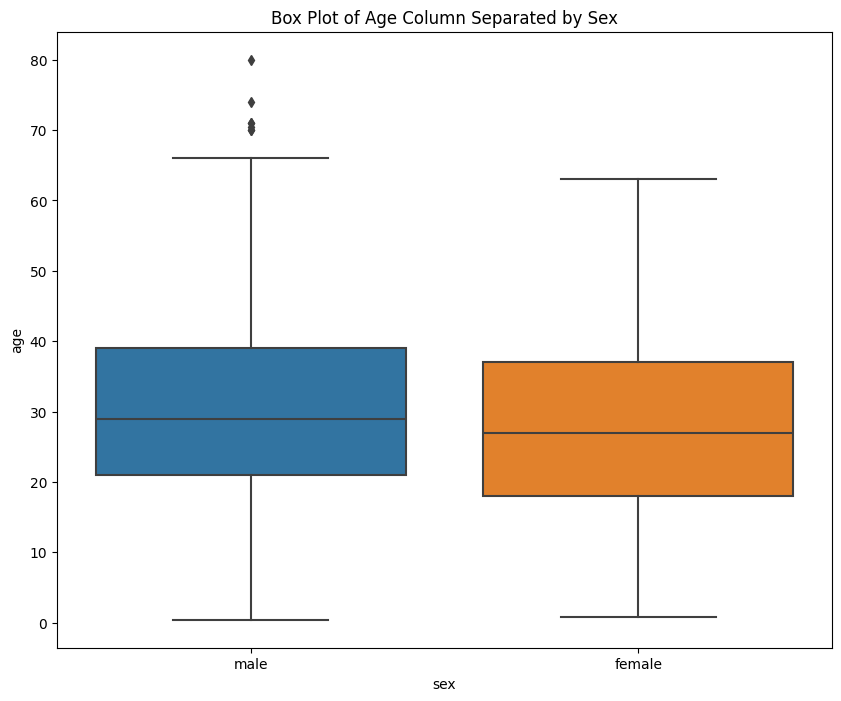

Traceback (most recent call last):
  File "C:\Users\mmalhariwa001\AppData\Roaming\Python\Python310\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 310, in run
    ).run(input)
  File "C:\Users\mmalhariwa001\AppData\Roaming\Python\Python310\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "C:\Users\mmalhariwa001\AppData\Roaming\Python\Python310\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
  File "C:\Users\mmalhariwa001\AppData\Roaming\Python\Python310\site-packages\pandasai\pipelines\chat\code_execution.py", line 113, in execute
    raise e
  File "C:\Users\mmalhariwa001\AppData\Roaming\Python\Python310\site-packages\pandasai\pipelines\chat\code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
  File "C:\Users\mmalhariwa001\AppData\Roaming\Python\Python310\site-packages\pandasai\pipelines\chat\code_execution.py", line 175, in execute_co

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [17]:
kde_plot = df.chat("""Please plot the kde distribution of age column and separate them with survived column""")

box_plot = df.chat("""Return me the box plot visualization of the age column separated by sex""")

heat_map = df.chat("""Give me heat map plot to visualize the numerical columns correlation""")

count_plot = df.chat("""Visualize the categorical column sex and survived""")

## Pandas AI Skills and Agents

Pandas AI allows users to pass an example function and execute it with an Agent decision. For example, the function below combines two different DataFrame, and we pass a sample plot function for the Pandas AI agent to execute.

In [22]:
import pandasai as pai
pai.clear_cache()

## Working with Agents

With the chat agent, you can engage in dynamic conversations where the agent retains context throughout the discussion. This enables you to have more interactive and meaningful exchanges.

### Key Features

1. Context Retention: The agent remembers the conversation history, allowing for seamless, context-aware interactions.

2. Clarification Questions: You can use the clarification_questions method to request clarification on any aspect of the conversation. This helps ensure you fully understand the information provided.

3. Explanation: The explain method is available to obtain detailed explanations of how the agent arrived at a particular solution or response. It offers transparency and insights into the agent’s decision-making process.



In [27]:
import os
import pandas as pd
from pandasai import Agent

employees_data = {
    "EmployeeID": [1, 2, 3, 4, 5],
    "Name": ["John", "Emma", "Liam", "Olivia", "William"],
    "Department": ["HR", "Sales", "IT", "Marketing", "Finance"],
}

salaries_data = {
    "EmployeeID": [1, 2, 3, 4, 5],
    "Salary": [5000, 6000, 4500, 7000, 5500],
}
salaries_data1 = {
    "EmployeeID": [1, 2, 3, 4, 5],
    "Salary": [5000, 6000, 4500, 7000, 5500],
}

employees_df = pd.DataFrame(employees_data)
salaries_df = pd.DataFrame(salaries_data)
salaries_df1 = pd.DataFrame(salaries_data1)

In [28]:
agent = Agent([employees_df, salaries_df,salaries_df1], memory_size=10)

query = "Who gets paid the most?"

# Chat with the agent
response = agent.chat(query)
print(response)


The employee who gets paid the most is Olivia.


In [29]:
# Get Clarification Questions
questions = agent.clarification_questions(query)

for question in questions:
    print(question)



Can you provide more information on the employees' salaries, such as the specific amounts for each employee?
Is there any additional criteria or conditions to consider when determining who gets paid the most?
Do you want to compare salaries between all employees or only a specific subset?


In [26]:
# Explain how the chat response is generated
response = agent.explain()
print(response)

I looked at the information about employees and their salaries. I found the salary that is the highest among all employees and identified which employee had that salary. Then, I put this information into a message that says who gets paid the most and how much they earn.


## Pandas AI Skills and Agents

Pandas AI allows users to pass an example function and execute it with an Agent decision. For example, the function below combines two different DataFrame, and we pass a sample plot function for the Pandas AI agent to execute.

In [18]:
import pandas as pd
from pandasai import Agent
from pandasai.skills import skill

employees_data = {
    "EmployeeID": [1, 2, 3, 4, 5],
    "Name": ["John", "Emma", "Liam", "Olivia", "William"],
    "Department": ["HR", "Sales", "IT", "Marketing", "Finance"],
}

salaries_data = {
    "EmployeeID": [1, 2, 3, 4, 5],
    "Salary": [5000, 6000, 4500, 7000, 5500],
}

employees_df = pd.DataFrame(employees_data)
salaries_df = pd.DataFrame(salaries_data)

# Function doc string to give more context to the model for use of this skill
@skill
def plot_salaries(names: list[str], salaries: list[int]):
    """
    Displays the bar chart  having name on x-axis and salaries on y-axis
    Args:
        names (list[str]): Employees' names
        salaries (list[int]): Salaries
    """
    # plot bars
    import matplotlib.pyplot as plt

    plt.bar(names, salaries)
    plt.xlabel("Employee Name")
    plt.ylabel("Salary")
    plt.title("Employee Salaries")
    plt.xticks(rotation=45)

    # Adding count above for each bar
    for i, salary in enumerate(salaries):
        plt.text(i, salary + 1000, str(salary), ha='center', va='bottom')
    plt.show()



In [27]:
agent = Agent([employees_df, salaries_df])
agent.add_skills(plot_salaries)

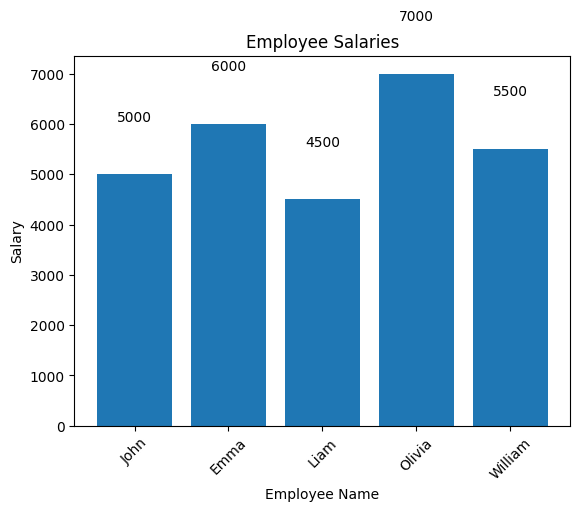

'C:/Users/mmalhariwa001/AION/exports/charts/temp_chart.png'

In [28]:
response = agent.chat("Plot the employee salaries against names")
response

### Using OPENAI API

In [8]:
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [10]:
from pandasai import SmartDataframe
from pandasai.llm import OpenAI

llm = OpenAI()  # no need to pass the API key, it will be read from the environment variable
pandas_ai = SmartDataframe("Loan payments data.csv", config={"llm": llm})


In [12]:
response=pandas_ai.chat("how many records are there")

In [13]:
response

500

In [16]:
from pandasai.helpers.openai_info import get_openai_callback
with get_openai_callback() as cb:
    response =pandas_ai.chat("list the names of the columns")

    print(response)
    print(cb)

Loan_ID, loan_status, Principal, terms, effective_date, due_date, paid_off_time, past_due_days, age, education, Gender
Tokens Used: 727
	Prompt Tokens: 417
	Completion Tokens: 310
Total Cost (USD): $ 0.000674


### Using Google Gemini API

In [ ]:
!pip install google.generativeai

In [9]:
import pandas as pd
from pandasai import SmartDataframe
from pandasai.llm.google_gemini import GoogleGemini

In [10]:
os.environ["GOOGLE_API_KEY"]=os.getenv("GOOGLE_API_KEY")

In [16]:
llm = GoogleGemini(api_key=os.getenv("GOOGLE_API_KEY"))

In [17]:
pandas_ai = SmartDataframe("Loan payments data.csv", config={"llm": llm})

In [19]:
response=pandas_ai.chat("How many columns are there in table")
response

11

## Connecting with Yahoo Finanace

In [ ]:
!pip install yfinance

In [19]:
import os

from pandasai import Agent
from pandasai.connectors.yahoo_finance import YahooFinanceConnector

yahoo_connector = YahooFinanceConnector("MSFT")

agent = Agent(yahoo_connector)

response = agent.chat("What is the closing price for yesterday?")
print(response)

The closing price for yesterday is 426.7300109863281.
